<a href="https://colab.research.google.com/github/Geriys/VKirillV/blob/main/nash_dom2_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Получение всех объектов

In [2]:
import requests
import json

In [ ]:
class Get_api:

offset_ = 0
limit_ = 500
all_objects = []

while True:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    tries = 5
    while True:
        response = requests.get(url)
        if response.ok:
            print(f'Страница получена! limit: {limit_}, offset: {offset_}')
            break
        tries -= 1
        print(f'Ошибка: {response.status}.')
        print(f'Осталось попыток {tries}.')
        time.sleep(1 * tries)
        if tries <= 0:
            raise Exception('too_many_tries')

    data_list = response.json().get('data', {}).get('list', [])
    print(len(data_list))
    if len(data_list) == 0: # прерываемся, если получили пустой массив
        break
    all_objects += data_list
    offset_ += limit_

json_str = json.dumps(all_objects)
open('all_objects.json', 'w').write(json_str)

Страница получена! limit: 500, offset: 0
500
Страница получена! limit: 500, offset: 500
500
Страница получена! limit: 500, offset: 1000
500
Страница получена! limit: 500, offset: 1500
500
Страница получена! limit: 500, offset: 2000
500
Страница получена! limit: 500, offset: 2500
500
Страница получена! limit: 500, offset: 3000
500
Страница получена! limit: 500, offset: 3500
500
Страница получена! limit: 500, offset: 4000
500
Страница получена! limit: 500, offset: 4500
500
Страница получена! limit: 500, offset: 5000
500
Страница получена! limit: 500, offset: 5500
500
Страница получена! limit: 500, offset: 6000
500
Страница получена! limit: 500, offset: 6500
500
Страница получена! limit: 500, offset: 7000
500
Страница получена! limit: 500, offset: 7500
500
Страница получена! limit: 500, offset: 8000
500
Страница получена! limit: 500, offset: 8500
500
Страница получена! limit: 500, offset: 9000
500
Страница получена! limit: 500, offset: 9500
500
Страница получена! limit: 500, offset: 10000

20749485

In [3]:
print(len(all_objects))

NameError: ignored

In [17]:
import json
f = open('all_objects.json')
t = f.read()
#print(t)
all_objects = json.loads(t)
print(len(all_objects))
#type(all_objects)

11717


list

In [20]:
#class Get_data:
# import json
 #def __init__(self, ):
  #import json

   #f = open('all_objects.json')
   #t = f.read()
   #all_objects = json.loads(t)
   #return (all_objects)
   #print(t)
   #print(len(all_objects))

In [32]:
#Сделали класс по загрузке данных из файла
class FileReader:
    import json
    def __init__(self, filename):
        self.filename = filename
        f = open(filename)
        self.content = f.read()

    def parse_json(self):
        return json.loads(self.content)

In [33]:
#Проверяем работу данного класса
fr = FileReader('all_objects.json')
arr = fr.parse_json()
print(len(arr))
print(arr[0])

11717
{'hobjId': 34754, 'objId': 13399, 'developer': {'devId': 306, 'shortName': '2МЕН ГРУПП', 'fullName': '2МЕН ГРУПП', 'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ', 'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'}, 'companyGroup': 5776, 'devInn': '7701651356'}, 'rpdRegionCd': 72, 'objAddr': 'г Тюмень, ул Профсоюзная, д. 56', 'objFloorMin': 1, 'objFloorMax': 1, 'objElemLivingCnt': 0, 'objReady100PercDt': '2024-12-31', 'objSquareLiving': 0.0, 'objCompensFundFlg': 0, 'objProblemFlg': 0, 'latitude': 57.1519, 'longitude': 65.5544, 'problemFlag': 'NONE', 'siteStatus': 'Строящиеся', 'objGuarantyEscrowFlg': 0, 'residentialBuildings': 0, 'rpdNum': '72-000097', 'pdId': 28141, 'buildType': 'Нежилое', 'objStatus': 0, 'hobjRenderPhotoUrl': 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/6C6B7A3A589C136AAB8F47F5BDCC02C31E7D0A1E', 'objPriceAVG': 50768, 'objPublDt': '2019-05-31'}


In [46]:
# Создаем класс для таблицы DataFrame из всех полученных данных
class cl_pd:
    import pandas as pd
    def __init__(self, arr):
        self.df = pd.json_normalize(arr)


In [50]:
dff = cl_pd(arr)
dff.df.shape

(11717, 39)

In [34]:
# Создаем таблицу DataFrame из всех полученных данных
#import pandas as pd
#df = pd.json_normalize(all_objects)

In [35]:
#df.shape

(11717, 39)

In [48]:
# Смотрим топ 5 данных из нашей переменной dff нашего класса
dff.df.head()

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,34754,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Сохраняем в csv файл
df.to_csv('vacancies.csv', index=False)
# Сохраняем в эксель-файл
df.to_excel('vacancies.xlsx', index=False)
# Сохраняем в файл в формате pickle
df.to_pickle('vacancies.pkl')

In [59]:
class Save_f:
    import pandas as pd
    def to_csv(self, ):
        self.df.to_csv('vacancies.csv', index=False)

    def to_xlsx(self, ):
        self.df.to_excel('vacancies.xlsx', index=False)

    def to_pickle(self, ):
        self.df.to_pickle('vacancies.pkl')

In [61]:
SaveF = save_f(dff)

TypeError: ignored

In [69]:
#Делаем класс по сохранению файлов
class DFSaver:
    #import pandas as pd
    def __init__(self, df):
        self.df = df

    def to_csv(self, filename):
        self.df.to_csv(filename, index=False)

    def to_excel(self, filename):
        self.df.to_excel(filename, index=False)

    def to_pickle(self, filename):
        self.df.to_pickle(filename, )

In [70]:
df_saver = DFSaver(dff.df)
df_saver.to_csv('vacancies.csv')

In [63]:
#full_obj = []
#for dom_id in tqdm(full_domID):
   # url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{dom_id}'
   # ress = requests.get(url)
  #  one_dom = ress.json()
    #full_obj.append(one_dom)

In [ ]:
df.columns

Index(['hobjId', 'objId', 'rpdRegionCd', 'objAddr', 'objFloorMin',
       'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt',
       'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg', 'latitude',
       'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
       'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus',
       'hobjRenderPhotoUrl', 'objPriceAVG', 'objPublDt', 'developer.devId',
       'developer.shortName', 'developer.fullName', 'developer.groupName',
       'developer.orgForm.id', 'developer.orgForm.fullForm',
       'developer.orgForm.shortForm', 'developer.companyGroup',
       'developer.devInn', 'objCommercNm', 'complexShortName',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object')

In [ ]:
type(df.objReady100PercDt[0])

str

In [ ]:
#df_norm = df
#df_norm.columns
#drop multiple columns by name
#df_norm.drop(['hobjId',   'objFloorMin',
 #      'objFloorMax', 'objElemLivingCnt',
  #      'objCompensFundFlg', 'objProblemFlg', 'latitude',
  #     'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
  #     'residentialBuildings', 'rpdNum', 'pdId', 'objStatus',
  #     'hobjRenderPhotoUrl',  'objPublDt', 'developer.devId',
  #     'developer.shortName', 'developer.fullName',
  #     'developer.orgForm.id', 'developer.orgForm.fullForm',
  #     'developer.orgForm.shortForm', 'developer.companyGroup',
  #       'complexShortName',
   #    'developer.bankruptStage.bankruptStageCd',
   #    'developer.bankruptStage.bankruptStageDesc',
   #    'developer.bankruptStage.bankruptLawUrl',
    #   'developer.orgBankruptMsgDttm'], axis= 1 , inplace= True )


In [ ]:
#objId
#rpdRegionCd
#objAddr
#objReady100PercDt
#objSquareLiving
#buildType
#objPriceAVG
#developer.groupName
#developer.devInn
#objCommercNm
#df_norm.columns

In [ ]:
df.columns

Index(['hobjId', 'objId', 'rpdRegionCd', 'objAddr', 'objFloorMin',
       'objFloorMax', 'objElemLivingCnt', 'objReady100PercDt',
       'objSquareLiving', 'objCompensFundFlg', 'objProblemFlg', 'latitude',
       'longitude', 'problemFlag', 'siteStatus', 'objGuarantyEscrowFlg',
       'residentialBuildings', 'rpdNum', 'pdId', 'buildType', 'objStatus',
       'hobjRenderPhotoUrl', 'objPriceAVG', 'objPublDt', 'developer.devId',
       'developer.shortName', 'developer.fullName', 'developer.groupName',
       'developer.orgForm.id', 'developer.orgForm.fullForm',
       'developer.orgForm.shortForm', 'developer.companyGroup',
       'developer.devInn', 'objCommercNm', 'complexShortName',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object')

In [ ]:
bm_price_series = df.set_index('objAddr')['objPriceAVG']
bm_price_series.head()

objAddr
г Тюмень, ул Профсоюзная, д. 56    50768.0
г Тюмень, ул Профсоюзная, д. 56    67159.0
г Тюмень, ул Профсоюзная, д. 56    47163.0
г Тюмень, ул Профсоюзная, д. 56    47886.0
г Тюмень, ул Профсоюзная, д. 56    62638.0
Name: objPriceAVG, dtype: float64

In [ ]:
bm_kodreg_addr = df.set_index('objAddr')['rpdRegionCd']
bm_kodreg_addr.drop_duplicates().head()
#bm_kodreg_addr.head()

objAddr
г Тюмень, ул Профсоюзная, д. 56                  72
г Вологда, ул Медуницинская, д. 11               35
город Новосибирск, район Советский               54
г Казань, район Приволжский р-н, ул Карбышева    16
г Лыткарино, мкр 6-й, корпус 4                   50
Name: rpdRegionCd, dtype: int64

In [ ]:
#ВЫВЕЛИ ТОП 5 РАЙОНОВ С МАКСИМАЛЬНОЙ ЦЕНОЙ
bm_price_series = df.sort_values(by='objPriceAVG', ascending=False).set_index('objAddr')['objPriceAVG']
bm_price_series.head()

objAddr
г Москва, район Пресненский р-н, пер Брюсов, д. 2/14, строение 10                      2820739.0
г Москва, район Пресненский р-н, пер Трёхпрудный, д. 9, строение 2                     2600000.0
г Москва, район Тверской р-н, ул Ильинка, д. 3/8                                       2259458.0
г Москва, пер 3-й Обыденский, вл. 1                                                    2239098.0
г Москва, район Р-н Якиманка, пер Большой Толмачёвский, корпус 4, строение 5, вл. 5    2212890.0
Name: objPriceAVG, dtype: float64

In [ ]:
#проверил командой максимум
bm_price_series.max()

2820739.0

In [ ]:
#проверил цену сортировкой массива
from heapq import nlargest
res1 = nlargest(5, bm_price_series)
print(res1)

[2820739.0, 2600000.0, 2259458.0, 2239098.0, 2212890.0]


In [ ]:
type(res1)

list

In [ ]:
#Загружаем все необходимые библиотеки
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
price_by_region = df[df['objPriceAVG'].notnull()].groupby('rpdRegionCd')['objPriceAVG'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

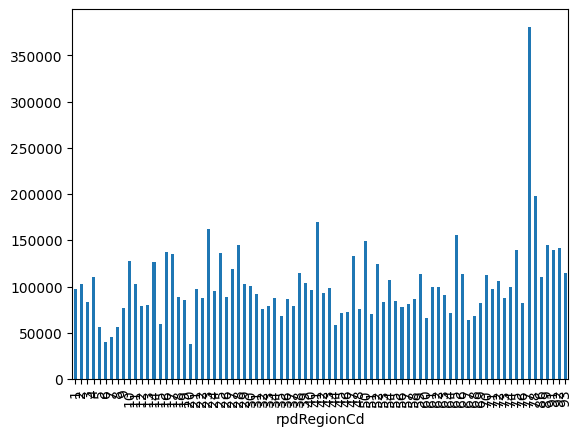

In [ ]:
#price_by_region = df[df['objPriceAVG'].notnull()].groupby('rpdRegionCd')['objPriceAVG'].mean()

#строим диаграммы в соответствии с примерами про бигмаки, по оси Y цена за квадратный метр по оси Х код региона
import matplotlib.pyplot as plt
price_by_region.plot(kind='bar')
plt.show

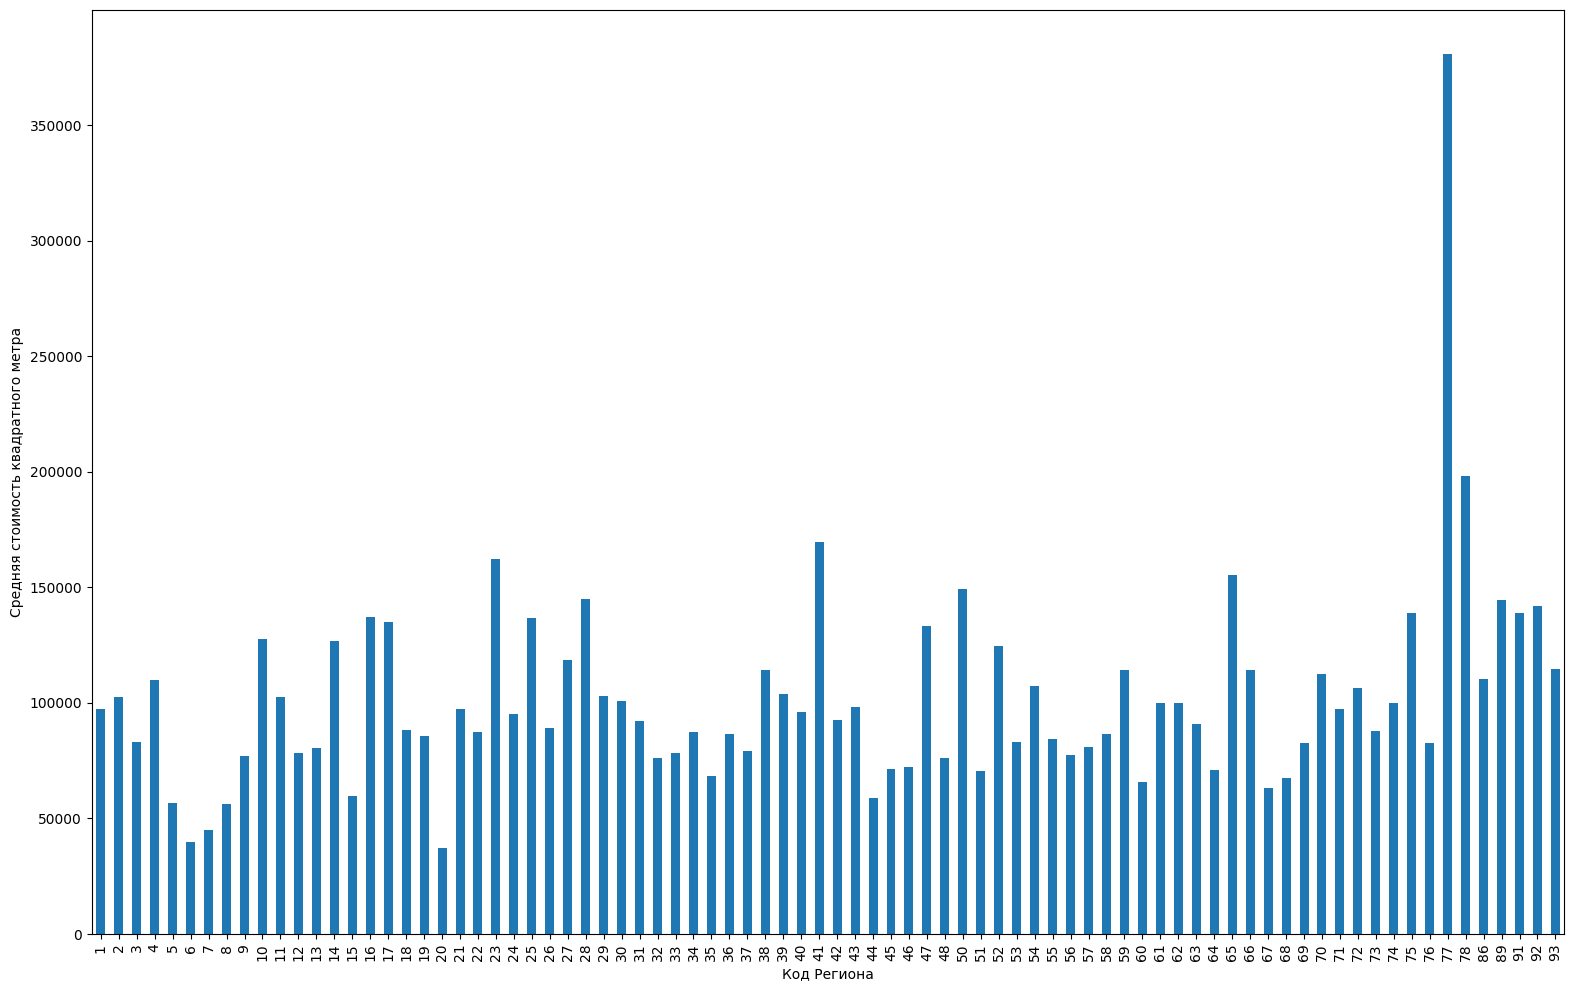

In [ ]:
#Сделали диаграмму со средними ценами на квадратный метр более читаемой, добавил описание осей.
from pylab import rcParams
rcParams['figure.figsize'] = 19,12
price_by_region.plot(kind='bar')
plt.xlabel('Код Региона')
plt.ylabel('Средняя стоимость квадратного метра')
plt.show()

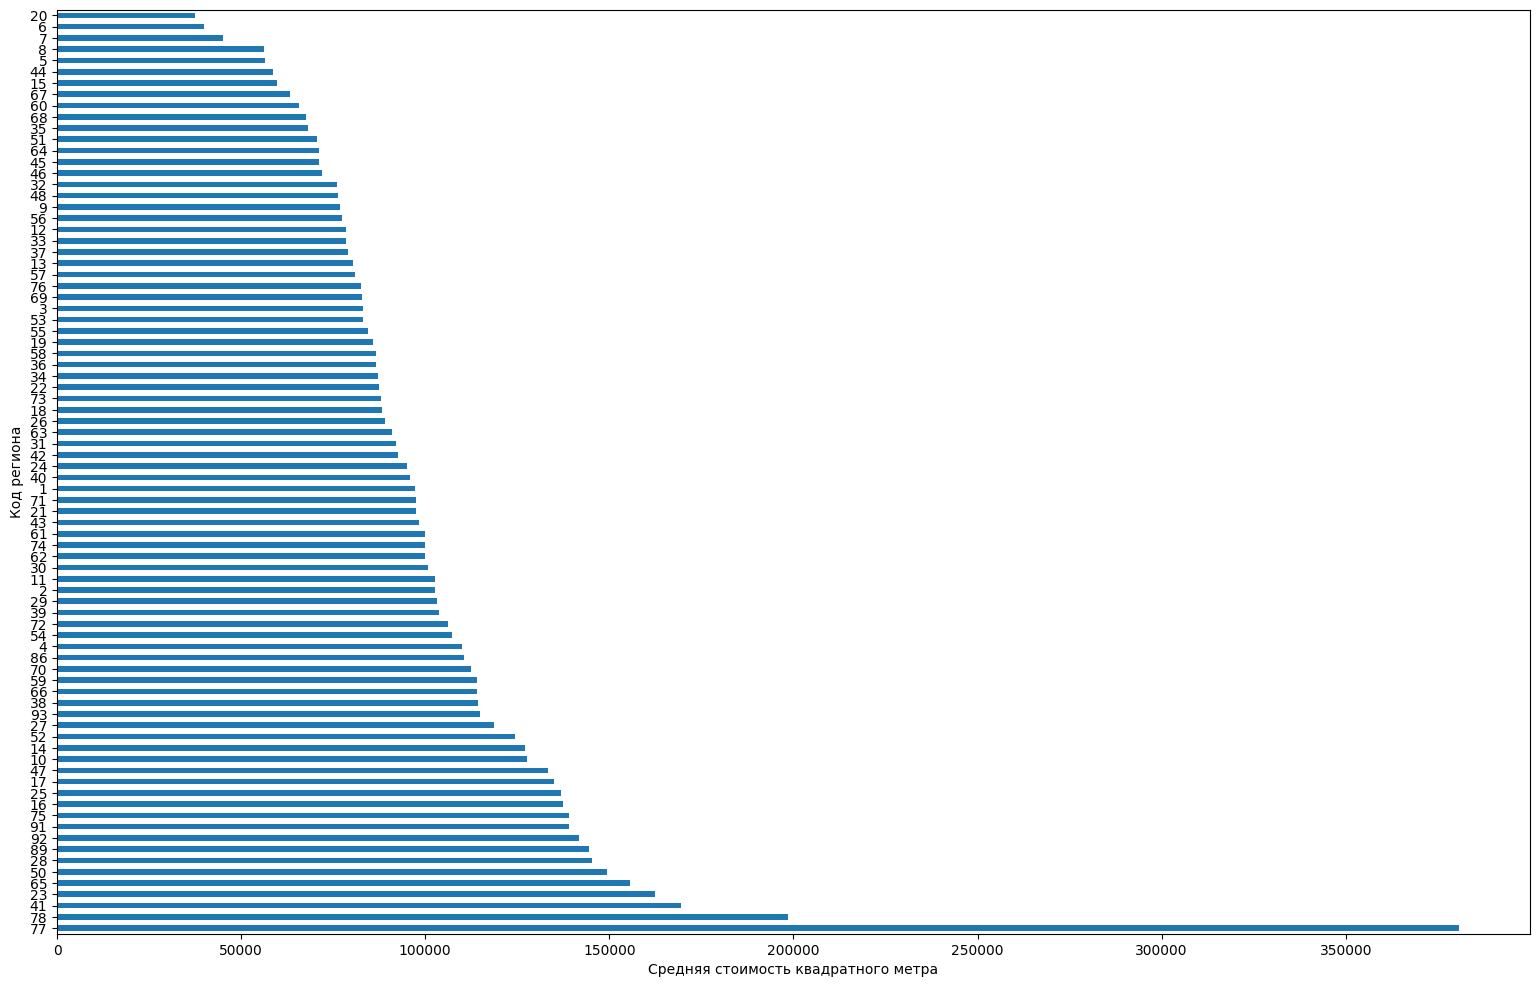

In [ ]:
#Отсортировали рассматриваемую сортировку
price_by_region.sort_values(ascending=False).plot(kind='barh')
plt.ylabel('Код региона')
plt.xlabel('Средняя стоимость квадратного метра')
plt.show()

In [ ]:
#Выводим список соответсвия кода региона адресу
print(bm_kodreg_addr.drop_duplicates())

objAddr
г Тюмень, ул Профсоюзная, д. 56                                               72
г Вологда, ул Медуницинская, д. 11                                            35
город Новосибирск, район Советский                                            54
г Казань, район Приволжский р-н, ул Карбышева                                 16
г Лыткарино, мкр 6-й, корпус 4                                                50
                                                                              ..
г Магадан, район Гороховое поле, ул Ягодная, д. 3                             49
г Петропавловск-Камчатский, ул Топоркова, д. 1                                41
г Мариуполь, пр-кт Металлургов, д. 54А                                        93
г Биробиджан, улица Осенняя, 4 метра на юго-восток от дома, д. 1, корпус А    79
г Назрань, пр-кт И.Базоркина, д. 68                                            6
Name: rpdRegionCd, Length: 86, dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
#Вывели отсортированный список соответствия региона и адреса/города.
bm_kodreg_addr_sor = df.sort_values(by='rpdRegionCd', ascending=False).set_index('objAddr')['rpdRegionCd']
print(bm_kodreg_addr_sor.drop_duplicates())

objAddr
г Мариуполь, пр-кт Металлургов, д. 54А                                           93
г Севастополь, ул Астана Кесаева, д. 3Б                                          92
г Симферополь, д. 18                                                             91
г Надым                                                                          89
город Анадырь, ул Мандрикова, д. 20, вл. дом                                     87
г Сургут                                                                         86
г Нарьян-Мар, ул Авиаторов                                                       83
г Биробиджан, улица Осенняя, 4 метра на юго-восток от дома, д. 1, корпус А       79
г Санкт-Петербург, ш Московское, д. 13, литера жз                                78
г Москва, район Р-н Южное Бутово, ш Варшавское                                   77
г Ярославль, ул Дядьковская                                                      76
г Чита, ул Токмакова, д. 50                                         